# Mechanics Lab 10 –  Inertial forces on the earth

For today's lab you'll be examining the effect of the Coriolis force on the surface of the earth. 
Generally we don't notice the non-inertial forces acting on us as the earth rotates. However, at sufficiently high velocities and over large enough distances the Coriolis force can have real world effects. For instance, it drives weather patterns, and legend has it that it threw off British gunman in a WWI battle near the Falkland Islands. 

For the sake of simplicity, we'll ignore the centrifugal force in this lab even though it frequently also has a component tangent to the surface of the earth.


## Objectives

In this lab you will 
* determine how to express the Coriolis force in spherical coordinates,
* numerically calculate the trajectory of a object constrained to the surface of a sphere under the influence of the Coriolis force,
* test your code by examining special cases and conserved properties,
* and apply your code to real-world situations.


In [1]:
%pylab inline
from scipy.integrate import odeint  # import the differential 
                                    # equation integrator

Populating the interactive namespace from numpy and matplotlib


## Equations of motion
Let's assume an object is fixed to the surface of the of a perfectly spherical earth. In this case the normal force will perfectly balance the radial component of the net force, and there will be zero velocity or acceleration in the radial direction.

To take advantage of this lovely symmetry, we will want to work the problem in spherical coordinates. Similarly to polar coordinates, the unit vectors change direction with position. In spherical coordinates

$$ d \hat r/d t = \dot \theta \hat \theta  +  sin \theta\dot \phi \hat \phi$$
$$ d \hat \phi /d t = - sin \theta \dot \phi \hat r - cos \theta \dot \phi \hat \theta$$
$$ d \hat \theta /d t = - \dot \theta \hat r + cos \theta \dot \phi \hat \phi$$


Therefore, when taking the derivatives of the position vector we find

$$ \vec r = r \hat r $$

$$ \vec v = \dot r \hat r + r sin \theta \dot \phi  \hat \phi + r \dot \theta \hat \theta $$

$$ \vec a = (\ddot r - r sin^2 \theta \dot \phi^2  - r \dot \theta^2) \hat r + (2 sin
\theta  \dot r \dot \phi + r sin \theta \ddot \phi + 2 r cos \theta \dot \phi \dot \theta) \hat \phi + (2 \dot r \dot \theta - r sin \theta cos \theta \dot \phi^2 + r \ddot \theta) \hat \theta $$


Using these equations for acceleration, we can write down the equations of motion. For example, since we know that the object won't be accelerating in $\hat{r}$, it is trivial to write the equation of motion in that direction:

$$ F_r = m a_r = m(\ddot r - r \dot \phi^2 sin^2 \theta - r \dot \theta^2) = 0 $$


To find the equations of motion in $\hat{\phi}$ and $\hat{\theta}$, we need to be able to express the forces (in this case, the Coriolis force) that can have a non-zero component in those directions. AAs you know, $ \vec F_{cor} = 2m \vec v \times \vec \Omega = -2m \vec \Omega \times \vec v $. For an object on the surface of the earth, $ \vec \Omega = \Omega \hat z$ and $\vec v = v_{\theta} \hat \theta + v_{\phi} \hat \phi$. 


**IMPORTANT:** $\theta$ is the *colatitude*, measured from the North Pole south toward the equator and the South Pole: $0 \le \theta \le \pi$. When you look up the official latitude of a location, the angle given is measured up (N) or down (S) from the equator. $\phi$ is the *azimuthal* angle that represents longitudes, $0 \le \phi \le 2\pi$. It is benchmarked at Greenwich, England, where $\phi = 0$. The official longitude is given as East or West of Greenwich. **IMPORTANT:** we measure increasing $\phi$ in the CCW (East) direction. When you model a physical location, like Grinnell or the Falkland Islands, you must adjust official latitudes and longitudes accordingly or your code will give you nonsensical trajectories.

#### Exercise 10.1 
In your lab notebook, work out $\vec{F_{cor}}$ for an object on the surface of the earth in spherical coordinates. You'll need to use the following relations (use your right hand to verify the directions to yourself before solving for the Coriolis force.)


$$ \hat z \times \hat r = -\hat r \times \hat z  = \hat \phi sin\theta$$
$$ \hat z \times \hat \theta = -\hat \theta \times \hat z = \hat \phi cos \theta $$
$$ \hat z \times \hat \phi = -\hat \phi \times \hat z = - \hat r sin \theta - \hat \theta cos \theta $$


#### Exercise 10.2
Write your equation of motion, $\vec{F_{net}} = m \vec{a} = \vec{F_{cor}}$, using **spherical** coordinates for both sides of the equations. Remember to express $v_\theta$ and $v_\phi$ in terms of r,$\dot \phi$ and $\dot \theta$. Simplify as much as possible (hint: what is $\dot r$?). Solve for accelerations $\ddot \phi$ and $\ddot \theta$, which you will use in your deriv function. Be sure to check your results with your lab instructor. 

## Solving the equations of motion
Now that you have the equations of motion, it's time to compute the numerical solution. 

### Setting the initial conditions and other physical parameters
#### Exercise 10.3
Define the parameters of the problem and the initial conditions in the cell below. For now, set the radius of the earth to 1 and the angular speed of the earth, $\Omega$, to 0.1.  Let your initial conditions be $\phi_0 = \pi/4$, $\dot \phi_0 = 0$, $\theta_0 = \pi/4$, $\dot \theta_0 = 0.1$. 

In [2]:
# Defining constants (r and omega) and the initial conditions
rEarth = 1
omega = 0.1
phi0 = pi/4
dphi0 = 0
theta0 = pi/4
dtheta0 = 0.1

### Numerical integration
 
#### Exercise 10.4
Define a function that will return the derivatives for your four variables, $\phi, \dot \phi, \theta$, and $\dot \theta$. Then use odeint to solve for \\(0 \leq t \ \leq 2 \pi \\). Set max_time to a reasonable amount (about the time it would take for the object to circumnavigate the world at its initial velocity is a good first estimate). In order to ensure an accurate calculation set rtol=1.0e-11 and atol=1.0e-11 in your call to odeint.

In [3]:
# Define the deriv function
# Use odeint to integrate the equations of motion
def deriv(f,t):
    phi = f[0]
    dphi = f[1] 
    theta = f[2]
    dtheta = f[3]
    
    dphir = dphi
    dthetar = dtheta
    ddtheta = cos(theta)*sin(theta)*dphi*(dphi+2*omega)
    ddphi = (-2*dtheta*(dphi+omega))/tan(theta)
    return array([dphir,ddphi,dthetar,ddtheta])

time = linspace(0,200,10000)
fInit = array([phi0,dphi0,theta0,dtheta0])
r = odeint(deriv, fInit, time, printmessg=1, rtol=1.0e-11, atol=1.0e-11)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/integrate/odepack.py:251: ODEintWarning: Integration successful.
  warnings.warn(warning_msg, ODEintWarning)


#### Exercise 10.5
Check your integration by first plotting $\theta$ (colatitude) in degrees vs. $\phi$ (longitude) in degrees. Set the axes of your plot so that the entire possible range of $\phi$ and $\theta$ are visible. 

You may also wish to adjust your plotting so that values of $\phi$ wrap around. In other words, $\phi$ should be limited to the range $-\pi < \phi \leq \pi$. To do this, check out the modulus operator, %.

Text(0, 0.5, 'phi degree')

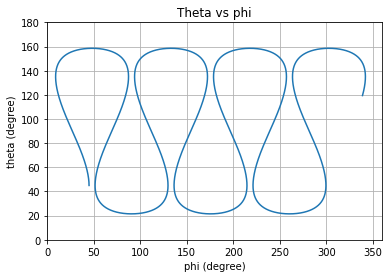

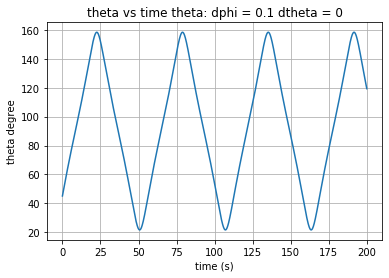

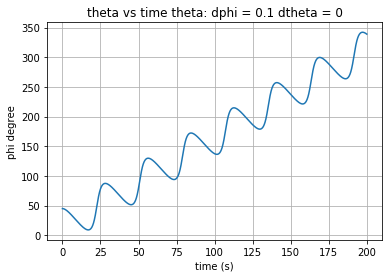

In [4]:
# Plots go here:
phi = r[:,0]
dphi = r[:,1] 
theta = r[:,2]
dtheta = r[:,3]

phi_degree = phi/pi*180
theta_degree = theta/pi*180

figure()
grid()
plot(phi_degree,theta_degree)
axis([-50,150,180,0])
title('Theta vs phi')
xlabel('phi (degree)')
ylabel('theta (degree)')
xlim([0,360])
ylim([0,180])

figure()
grid()
plot(time, theta_degree)
title('theta vs time theta: dphi = 0.1 dtheta = 0')
xlabel('time (s)')
ylabel('theta degree')

figure()
grid()
plot(time, phi_degree)
title('theta vs time theta: dphi = 0.1 dtheta = 0')
xlabel('time (s)')
ylabel('phi degree')

### Plotting on the surface of a sphere

You can make a potentially more meaningful plot by plotting in 3-D on the surface of a sphere. The following section of code will walk you through how to do this.

#### Exercise 10.6
First, write formulas to calculate the cartesian coordinates of the object based on $\phi$ and $\theta$


In [5]:
# Transformation from spherical to cartesian coordinates

x = rEarth*sin(theta)*cos(phi)
y = rEarth*sin(theta)*sin(phi)
z = rEarth*cos(theta)

#### Exercise 10.7
The following code plots a wire-frame sphere in 3-D. Add a command to plot the (x,y,z) coordinates you calculated above on the sphere using the command *ax.plot(x, y, z)*. If you would like to see the sphere from a different viewing angle, change the values of elev and azim in "ax.view_init."

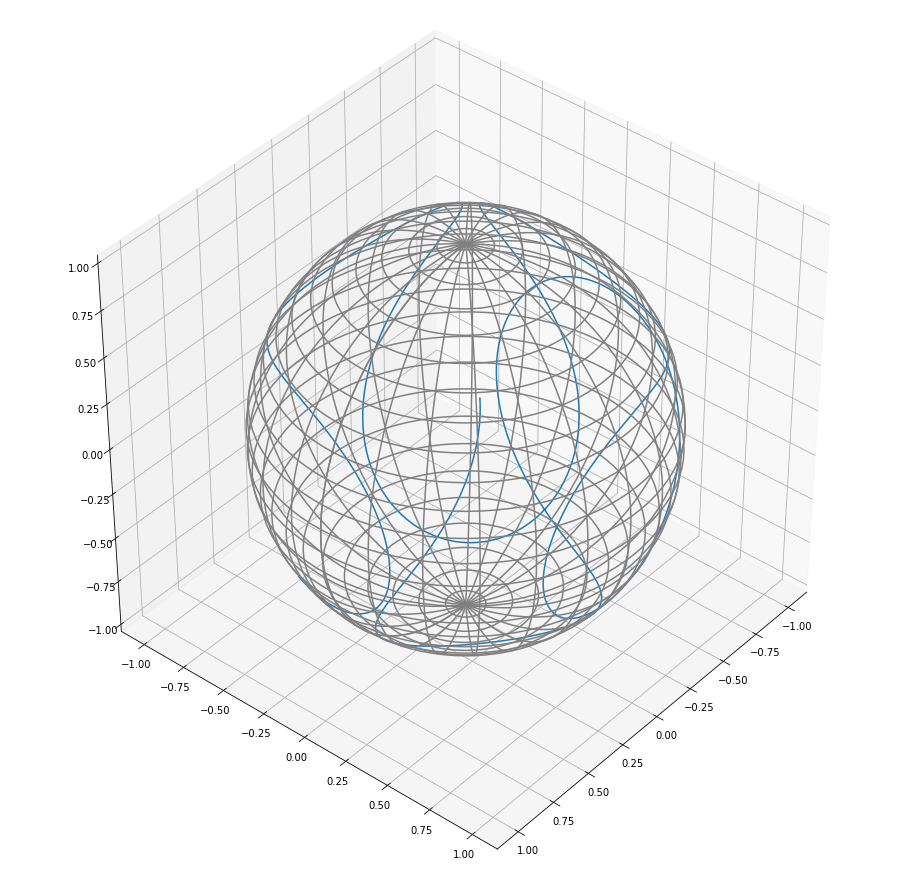

In [6]:
from mpl_toolkits.mplot3d import Axes3D

# Set of all spherical angles:
u = linspace(0, 2*pi, 100)
v = linspace(0, pi, 100)

# Cartesian coordinates that correspond to the spherical angles:
# (this is the equation of an sphere):
x_sphere = rEarth*outer(cos(u), sin(v))
y_sphere = rEarth*outer(sin(u), sin(v))
z_sphere = rEarth*outer(ones_like(u), cos(v))

# Plot:
fig = plt.figure(figsize=plt.figaspect(1)*4)  # Square figure
ax = fig.add_subplot(111, projection='3d') # Add a 3-D subplot
ax.plot(x, y, z)
ax.plot_wireframe(x_sphere, y_sphere, z_sphere,  rstride=4, cstride=4, color='0.5') #Plot a sphere
ax.view_init(elev=40.,azim=40) #Change the orientation of the plot

# Add call to plot the trajectory below


## Verifying your code

#### Exercise10.8
You are going to be making quite a few plots of trajectories with varying initial conditions. You can save yourself a lot of time if you write a function that will take your initial conditions, create a time array, solve for the trajectory and then plot it on the sphere (code from 10.7).

In [7]:
from mpl_toolkits.mplot3d import Axes3D
#Define a spherical plotting function
def plotSphere(fInit, tMax):
    n_steps = int(tMax*100)
    time = linspace(0,tMax,n_steps) ### FIX
    fSoln = odeint(deriv, fInit, time, rtol=1.0e-11, atol=1.0e-11)
    
    phi = fSoln[:,0]
    theta = fSoln[:,2]
    # Transform Solution from spherical 
    # to cartesian coordinates as in Ex. 10.6
  
    x = rEarth*sin(theta)*cos(phi)
    y = rEarth*sin(theta)*sin(phi)
    z = rEarth*cos(theta)
       
    # Set of all spherical angles:
    u = linspace(0, 2*pi, 100)
    v = linspace(0, pi, 100)

    # Cartesian coordinates that correspond to the spherical angles:
    # (this is the equation of an sphere):
    x_sphere = rEarth*outer(cos(u), sin(v))
    y_sphere = rEarth*outer(sin(u), sin(v))
    z_sphere = rEarth*outer(ones_like(u), cos(v))

    # Plot:
    fig = plt.figure(figsize=plt.figaspect(1)*4)  # Square figure
    ax = fig.add_subplot(111, projection='3d') # Add a 3-D subplot
    ax.plot(x, y, z)
    ax.plot_wireframe(x_sphere, y_sphere, z_sphere,  rstride=4, cstride=4, color='0.7') #Plot a sphere
    ax.view_init(elev=30.,azim=40) #Change the orientation of the plot
    
    # Add call to plot the trajectory 




Verify your integration by changing the initial conditions to check at least **two** special cases. Choose initial conditions that you think you can predict. Use the graphs to confirm your predictions, or to learn what your misconceptions are. Examples: No inital velocity; moving east in the northern hemisphere; moving east on the equator; moving south from the North Pole. Explain whether the results are what you predicted below. Include your plots in the next cell.

    case1:
    
    prediction: the object will move without the effect of coriolis force. 
    
    The graph mathes our prediction, since the coriolis force is towards the direction of the centrifugal force, which does not affect the direction of motion
    
    case2:
    
    prediction, the object will first move to the left when crossing the equator and then move towards right.
    
    Our graph mathces the prediction. The object first move towards left because right hand rule. Then in the north hemisphere, the object will move towards right because of right hand rule. 



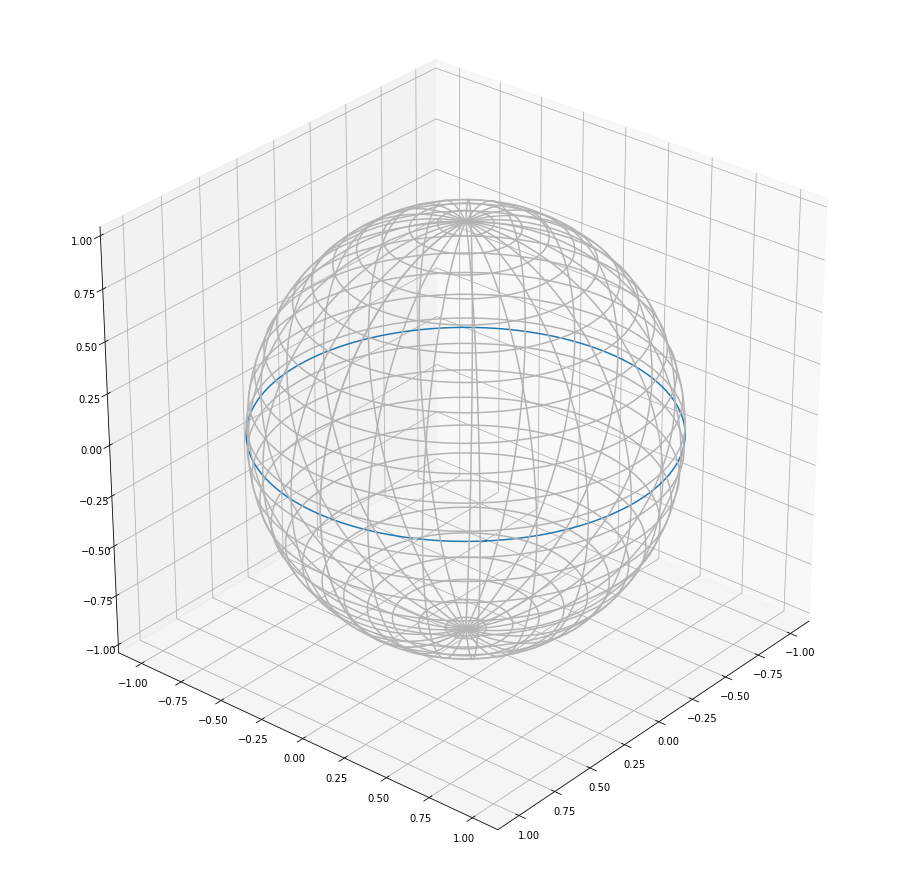

In [8]:
#Include plots here
# case 1
phi0 = pi/4
dphi0 = 1
theta0 = pi/2
dtheta0 = 0
fInit = array([phi0,dphi0,theta0,dtheta0])
plotSphere(fInit,2*pi)

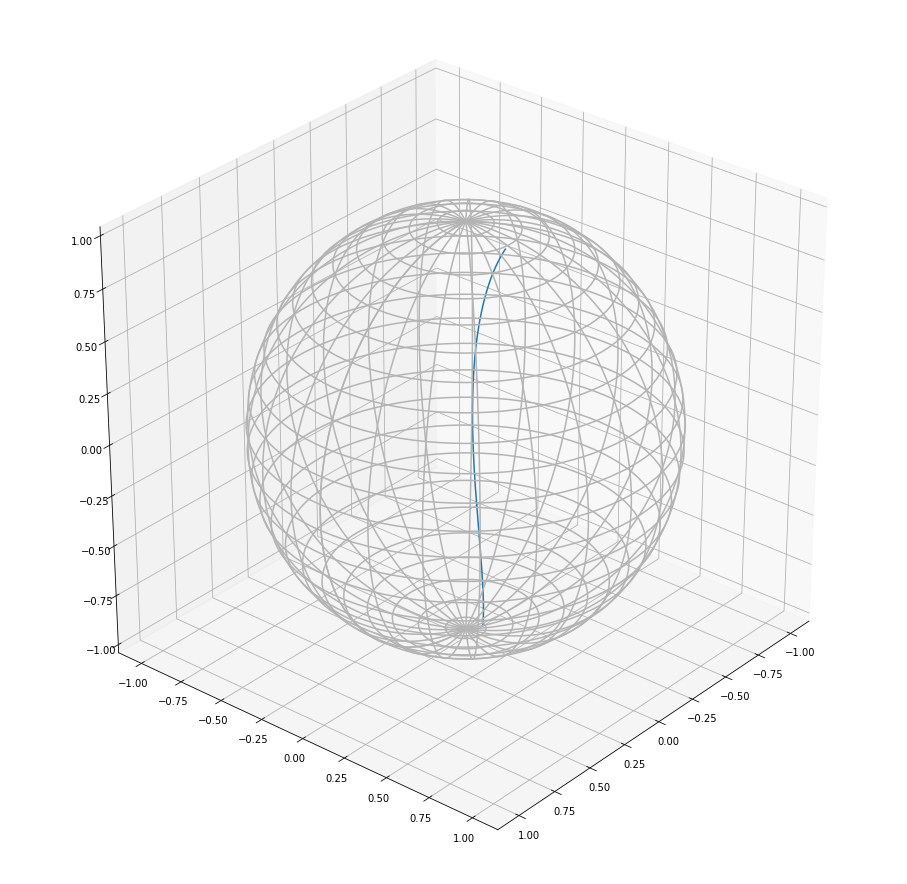

In [9]:
# case 2
phi0 = pi/4
dphi0 = 0
theta0 = pi/2+0.5
dtheta0 = -0.3
fInit = array([phi0,dphi0,theta0,dtheta0])
plotSphere(fInit,2*pi)

Another way to verify your code to examine the speed of the mass over time.

#### Exercise 10.9
How do you expect the Coriolis force to affect the speed of the mass? (Hint: how much work does the Coriolis force do?)

  The force only changes the direction of the velocity without changing its magnitude. 

#### Exercise 10.10
Revert your initial conditions back to your first ones. Include the following two plots below: 1) the speed of the puck, the component of the velocity in $\phi$, and the component of the velocity in $\theta$ versus time and 2) the fractional amount the speed changes over time ($(v - v_{init})/v_{init}$ versus t). Make any necessary changes to your integrator and use your velocity plots to justify the accuracy of your code.

    \ the plot matches our prediction. The speed does not change. 
    \ The accuracy is about 1ee-10 considering the variation of speed
    \
    \
    \
    \


Text(0, 0.5, 'fraction of speed')

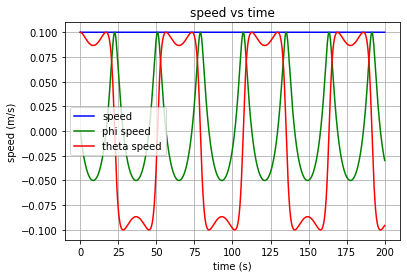

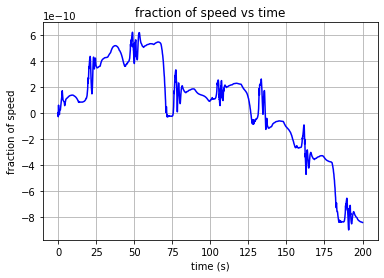

In [12]:
# Include plots here
rEarth = 1
omega = 0.1
phi0 = pi/4
dphi0 = 0
theta0 = pi/4
dtheta0 = 0.1

time = linspace(0,200,10000)
fInit = array([phi0,dphi0,theta0,dtheta0])
r = odeint(deriv, fInit, time, rtol=1.0e-11, atol=1.0e-11)

phi = r[:,0]
dphi = r[:,1] 
vphi = sin(theta)*dphi*rEarth
theta = r[:,2]
dtheta = r[:,3]
vtheta = dtheta * rEarth
speed = sqrt(vphi**2+vtheta**2)

figure()
grid()
plot(time, speed, 'b', label = 'speed')
plot(time, vphi, 'g', label = 'phi speed')
plot(time, vtheta, 'r', label = 'theta speed')
title('speed vs time')
xlabel('time (s)')
ylabel('speed (m/s)')
legend()

speed0 = sqrt(dphi[0]**2+dtheta0**2)
frac = (speed-speed0)/speed0

figure()
grid()
plot(time, frac, 'b', label = 'speed')
title('fraction of speed vs time')
xlabel('time (s)')
ylabel('fraction of speed')


## Explore different initial conditions

#### Exercise 10.11
Run your code again using additional initial conditions to answer the following questions. You may wish to change the maxTime for your integration as you explore these. Your plotSphere function will come in handy here, though you may find that 2D plots of $\theta$ vs. $\phi$, or $\phi$ vs. time, or $\theta$ vs. time also increase your understanding of the coriolis force.

1) What happens to the trajectory as the initial value of $\phi$ increases? Is this what you would have expected? Why?

 
   /  Increased phi will change nothing.
   
   /  Fcor only depend on omega and dphi dtheta
   /  
   the graph matches our prediction
   /  
   /  
   /  
   /  
   /  
   /  
   / 


   



Text(0, 0.5, 'theta ')

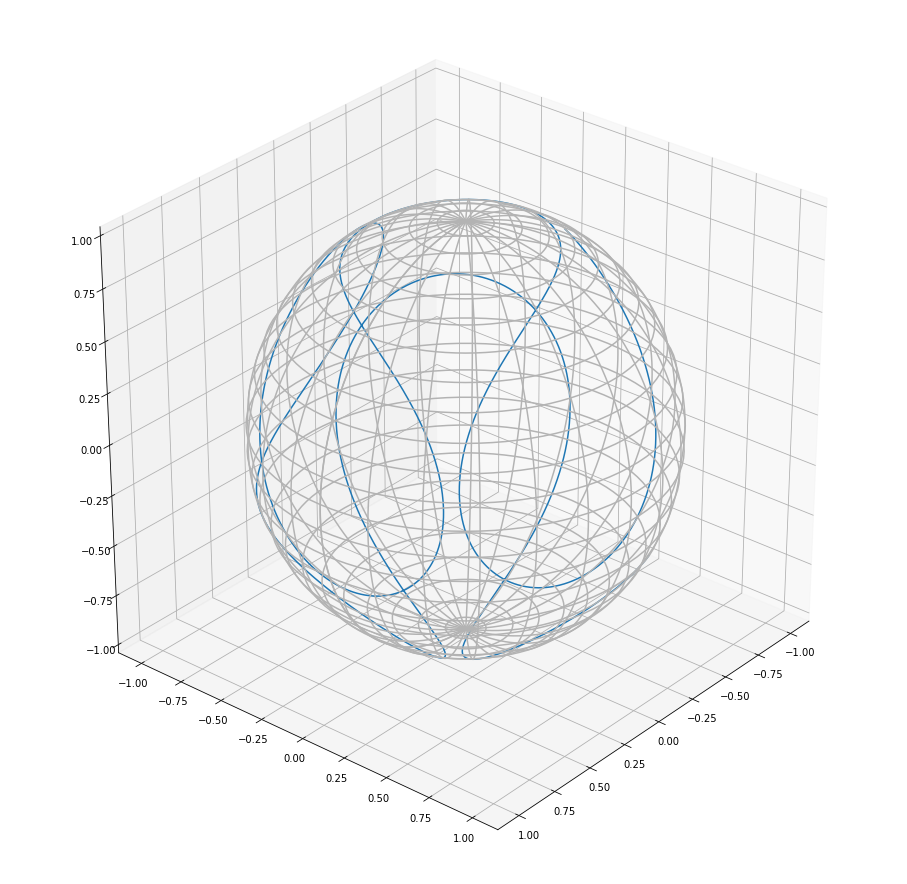

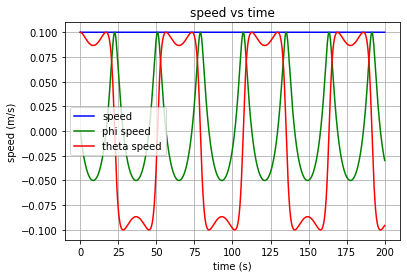

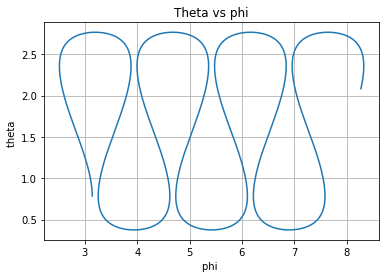

In [14]:
#10.11a
# Include Plots Here

rEarth = 1
omega = 0.1
phi0 = pi
dphi0 = 0
theta0 = pi/4
dtheta0 = 0.1

time = linspace(0,200,10000)
fInit = array([phi0,dphi0,theta0,dtheta0])
r = odeint(deriv, fInit, time, rtol=1.0e-11, atol=1.0e-11)
plotSphere(fInit,200)

phi = r[:,0]
dphi = r[:,1] 
vphi = sin(theta)*dphi*rEarth
theta = r[:,2]
dtheta = r[:,3]
vtheta = dtheta * rEarth
speed = sqrt(vphi**2+vtheta**2)

figure()
grid()
plot(time, speed, 'b', label = 'speed')
plot(time, vphi, 'g', label = 'phi speed')
plot(time, vtheta, 'r', label = 'theta speed')
title('speed vs time')
xlabel('time (s)')
ylabel('speed (m/s)')
legend()

speed0 = sqrt(dphi[0]**2+dtheta0**2)
frac = (speed-speed0)/speed0

figure()
grid()
plot(phi,theta)
title('Theta vs phi')
xlabel('phi ')
ylabel('theta ')



2) What happens to the trajectory as the initial value of $\theta$ increases? Is this what you would have expected? Why?

   /  there are two cases 
   
   case 1: theta < pi/2
       the deviation caused by Fcor is weaker. Because Fcor proportional to velocity cross omega. A larger theta will generate a smaller corss product which result in a smaller Fcor.When crossing the equator, the direction of Fcor changes and the magnitude increases. 
   
   case 2: theta > pi/2
       The direction of Fcor will be left. The magnitude of Fcor depends on the value of theta. 
       
   Our graph matches our prediction 

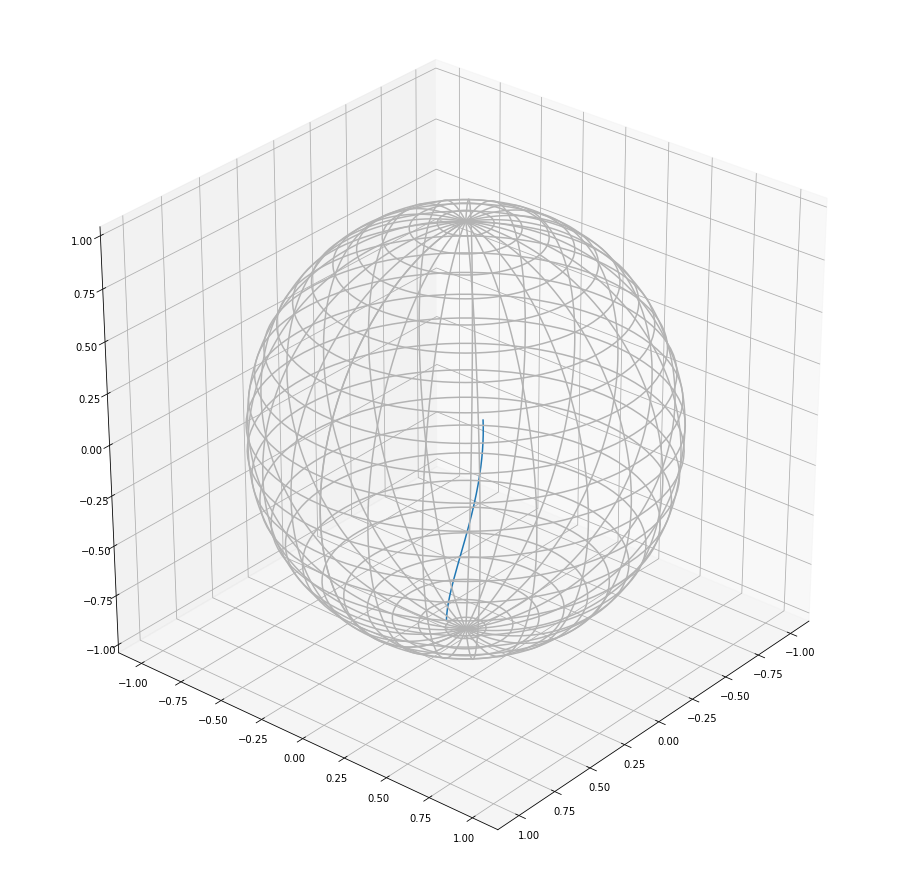

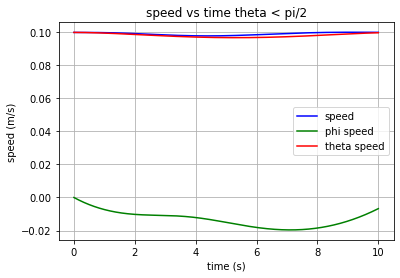

In [22]:
#10.11b
# Include Plots Here
# case 1
rEarth = 1
omega = 0.1
phi0 = pi/4
dphi0 = 0
theta0 = pi/3
dtheta0 = 0.1

time = linspace(0,10,10000)
fInit = array([phi0,dphi0,theta0,dtheta0])
r = odeint(deriv, fInit, time, rtol=1.0e-11, atol=1.0e-11)
plotSphere(fInit,10)

phi = r[:,0]
dphi = r[:,1] 
vphi = sin(theta)*dphi*rEarth
theta = r[:,2]
dtheta = r[:,3]
vtheta = dtheta * rEarth
speed = sqrt(vphi**2+vtheta**2)

figure()
grid()
plot(time, speed, 'b', label = 'speed')
plot(time, vphi, 'g', label = 'phi speed')
plot(time, vtheta, 'r', label = 'theta speed')
title('speed vs time theta < pi/2')
xlabel('time (s)')
ylabel('speed (m/s)')
legend()

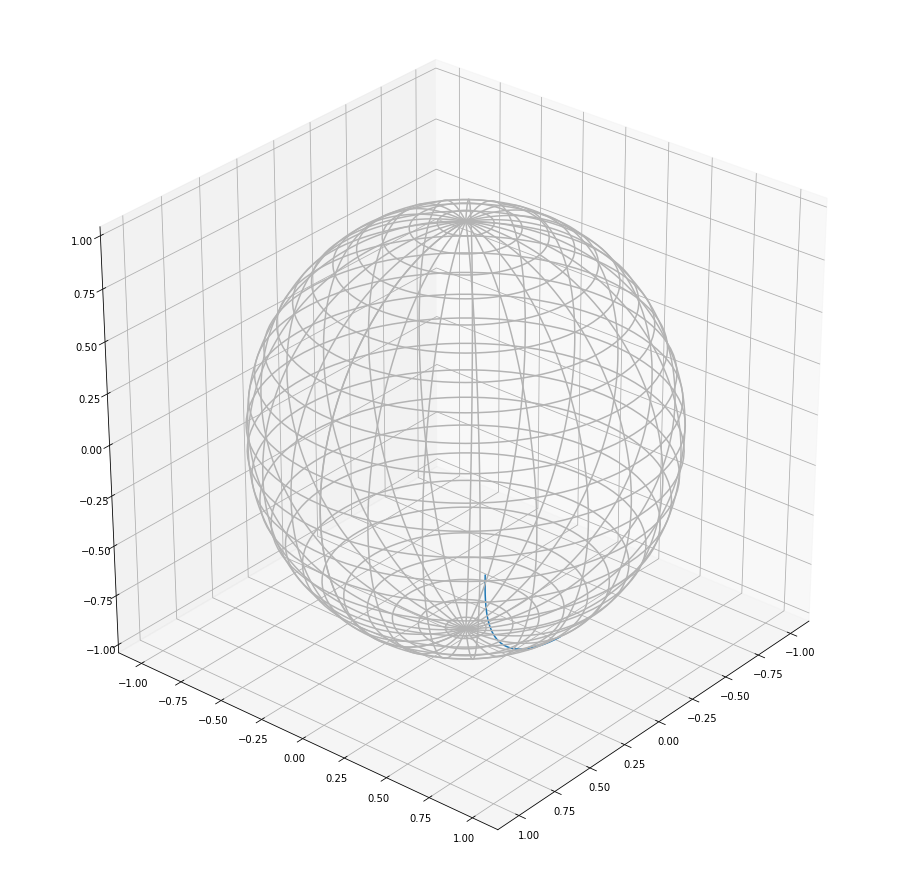

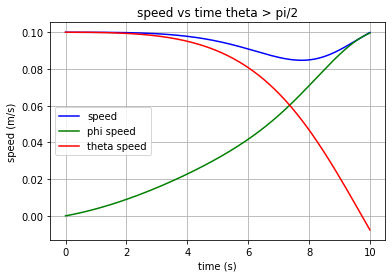

In [25]:
# case 2
rEarth = 1
omega = 0.1
phi0 = pi/4
dphi0 = 0
theta0 = pi*5/9
dtheta0 = 0.1

time = linspace(0,10,10000)
fInit = array([phi0,dphi0,theta0,dtheta0])
r = odeint(deriv, fInit, time, rtol=1.0e-11, atol=1.0e-11)
plotSphere(fInit,10)

phi = r[:,0]
dphi = r[:,1] 
vphi = sin(theta)*dphi*rEarth
theta = r[:,2]
dtheta = r[:,3]
vtheta = dtheta * rEarth
speed = sqrt(vphi**2+vtheta**2)

figure()
grid()
plot(time, speed, 'b', label = 'speed')
plot(time, vphi, 'g', label = 'phi speed')
plot(time, vtheta, 'r', label = 'theta speed')
title('speed vs time theta > pi/2')
xlabel('time (s)')
ylabel('speed (m/s)')
legend()

3) What happens to the trajectory if the initial velocity is in $\hat \phi$ instead of $\hat \theta$?

   /  (double-click to add text)
   /  
   /  Fcor is perpendicular to the axis of rotation, which has a component of force in theta direction. The velocity of theta will increase and the velocity of phi will decrease. 
   /  
   /  
   /  
   /  
   /  
   /  
   / 

Text(0, 0.5, 'theta ')

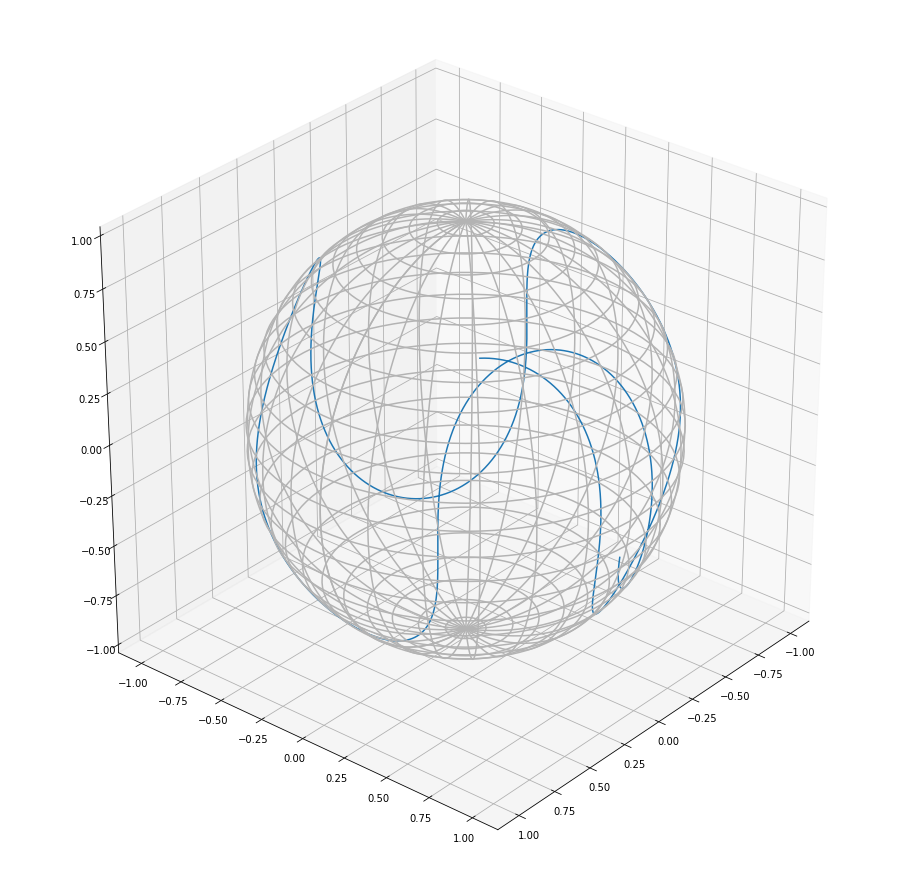

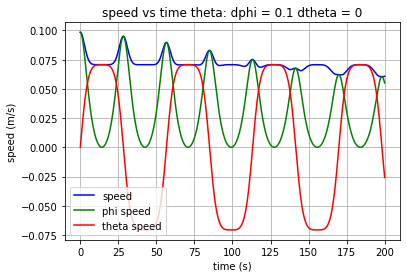

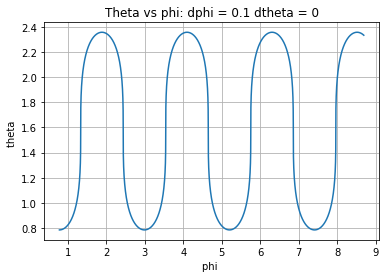

In [26]:
#10.11c
# Include Plots Her
rEarth = 1
omega = 0.1
phi0 = pi/4
dphi0 = 0.1
theta0 = pi/4
dtheta0 = 0

time = linspace(0,200,10000)
fInit = array([phi0,dphi0,theta0,dtheta0])
r = odeint(deriv, fInit, time, rtol=1.0e-11, atol=1.0e-11)
plotSphere(fInit,200)

phi = r[:,0]
dphi = r[:,1] 
vphi = sin(theta)*dphi*rEarth
theta = r[:,2]
dtheta = r[:,3]
vtheta = dtheta * rEarth
speed = sqrt(vphi**2+vtheta**2)

figure()
grid()
plot(time, speed, 'b', label = 'speed')
plot(time, vphi, 'g', label = 'phi speed')
plot(time, vtheta, 'r', label = 'theta speed')
title('speed vs time theta: dphi = 0.1 dtheta = 0')
xlabel('time (s)')
ylabel('speed (m/s)')
legend()

speed0 = sqrt(vphi[0]**2+vtheta[0]**2)
frac = (speed-speed0)/speed0

figure()
grid()
plot(phi,theta)
title('Theta vs phi: dphi = 0.1 dtheta = 0')
xlabel('phi ')
ylabel('theta ')


4) What happens to the trajectory as the initial velocity decreases?

   It will be bound to the motion in the equator. 
   / 

Text(0, 0.5, 'theta ')

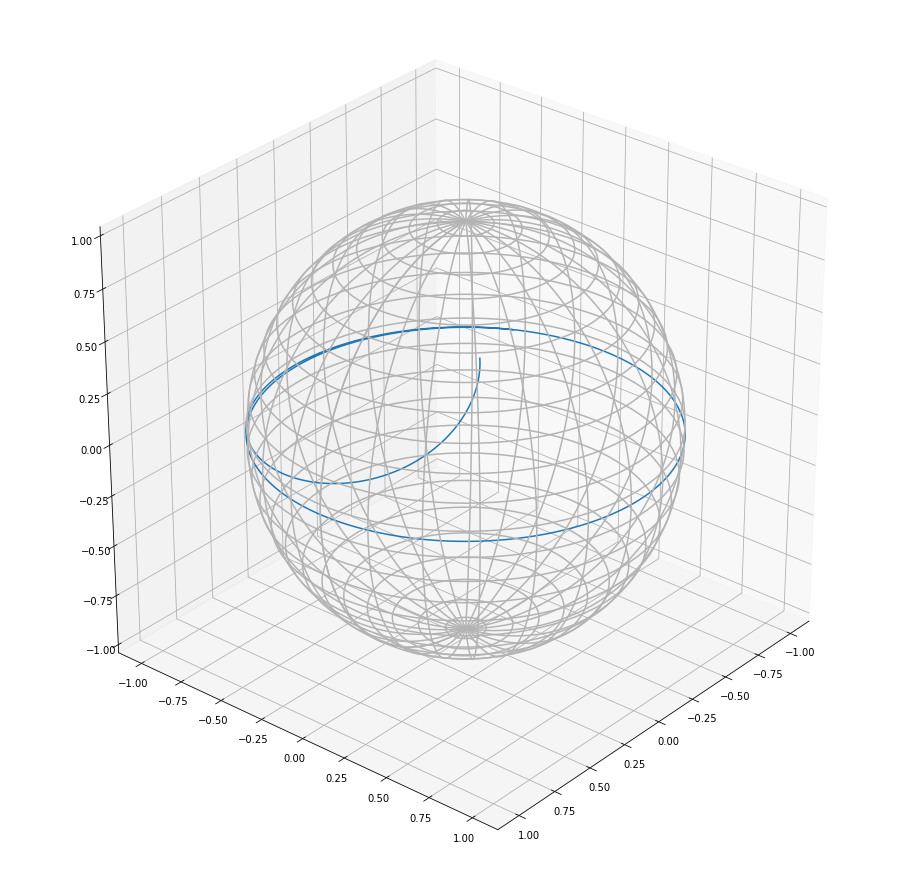

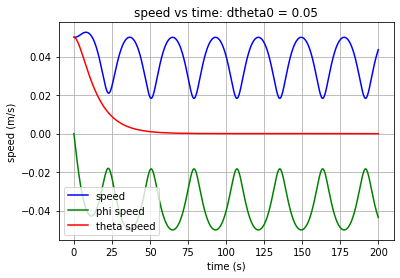

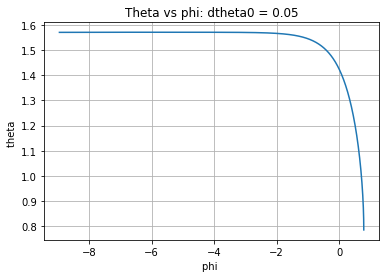

In [40]:
#10.11d
# Include Plots Here
#10.11b
# Include Plots Here
rEarth = 1
omega = 0.1
phi0 = pi/4
dphi0 = 0
theta0 = pi/4
dtheta0 = 0.05


time = linspace(0,200,10000)
fInit = array([phi0,dphi0,theta0,dtheta0])
r = odeint(deriv, fInit, time, rtol=1.0e-11, atol=1.0e-11)
plotSphere(fInit,200)

phi = r[:,0]
dphi = r[:,1] 
vphi = sin(theta)*dphi*rEarth
theta = r[:,2]
dtheta = r[:,3]
vtheta = dtheta * rEarth
speed = sqrt(vphi**2+vtheta**2)

figure()
grid()
plot(phi,theta)
title('Theta vs phi: dtheta0 = 0.05')
xlabel('phi ')
ylabel('theta ')

## Integrate with realistic parameters
Now, try running your code with some realistic values. 

#### Exercise 10.12
Change the parameters to reflect the earth's actual radius and angular velocity in SI units.

In [41]:
# Actual values of the earth's angular velocity (omega) and radius (r)
rEarth = 6371000
omega = 7.292*10**(-5)
phi0 = pi/4
dphi0 = 0
theta0 = pi/4
dtheta0 = 0.1

#### Exercise 10.13
Calculate and plot (in colatitude vs longitude space) what the trajectory of a bullet fired East at 400 m/s from Grinnell, IA will be. For this you'll have to look up the coordinates of Grinnell and translate the velocity into spherical coordinates. (Notice that here we are neglecting how the Coriolis (or centrifugal) force would affect the altitude of the bullet.) Use odeint to solve for the trajectory of the bullet for $ 0 \leq t \le 10$ seconds.

Text(0, 0.5, 'theta ')

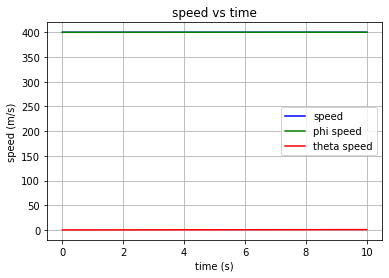

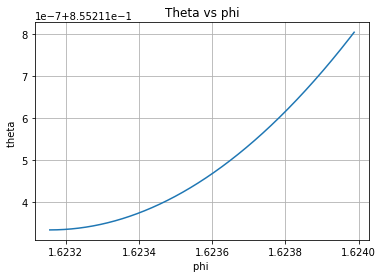

In [43]:
# Trajectory of bullet fired East at 400 m/s from Grinnell, IA
# Fill in code to set initial conditions, integrate, and plot below.
rEarth = 6371000
omega = 7.292*10**(-5)
phi0 = 93/180*pi
theta0 = (90-41)/180*pi
dphi0 = 400/(rEarth*sin(theta0))
dtheta0 = 0

time = linspace(0,10,10000)
fInit = array([phi0,dphi0,theta0,dtheta0])
r = odeint(deriv, fInit, time, rtol=1.0e-11, atol=1.0e-11)

phi = r[:,0]
dphi = r[:,1] 
vphi = sin(theta)*dphi*rEarth
theta = r[:,2]
dtheta = r[:,3]
vtheta = dtheta * rEarth
speed = sqrt(vphi**2+vtheta**2)

figure()
grid()
plot(time, speed, 'b', label = 'speed')
plot(time, vphi, 'g', label = 'phi speed')
plot(time, vtheta, 'r', label = 'theta speed')
title('speed vs time')
xlabel('time (s)')
ylabel('speed (m/s)')
legend()

speed0 = sqrt(vphi[0]**2+vtheta[0]**2)
frac = (speed-speed0)/speed0

figure()
grid()
plot(phi,theta)
title('Theta vs phi')
xlabel('phi ')
ylabel('theta ')

#### Exercise 10.14
After 10 seconds how far North-South has the bullet traveled? Compare this to the approximate distance traveled East.


   /  (double-click to add text)
   /  North South 3.005146358162736 m


East West 5300.0492546488695 m
   /  
   /  
   /  
   /  
   /  
   /  
   /  
   / 

In [44]:
#Calculation of distance traveled North-South and East.
deltaTheta = theta[-1]-theta[0]
dist_NS = rEarth*deltaTheta
deltaphi = phi[-1]-phi[0]
dist_EW = rEarth*sin(theta[0])*deltaphi
print('North South', dist_NS,'m')
print('East West', dist_EW,'m')

North South 3.005146358162736 m
East West 3999.9979481360633 m


#### Exercise 10.15
Now let's assume you are a British gunman in 1914 sailing near the Falkland islands (latitude of 52 degrees south, longitude 59 degrees west) on the battleship *Inflexible*. You are firing directly at the German battleship *Dresden*, which is ten miles to the south of you. Assuming a muzzle-speed of 1800 feet per second, calculate and plot the trajectory of the shell.

Reading from your plot, by how much and in what direction will the shell be deflected after it has traveled ten miles south?

   /  (double-click to add text)
   /  
   /  
   /  the shell be deflected 51.6685929558143 meters after it has traveled ten miles south
   /  
   /  
   /  
   /  
   /  
   / 

the shell be deflected 16.977208370456047 meters after it has traveled ten miles south


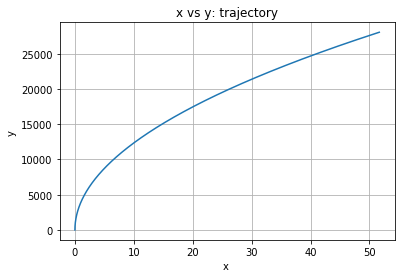

In [37]:
# Fill in code to set initial conditions, integrate, and plot below.
rEarth = 6371000
omega = 7.292*10**(-5)
phi0 = -59/180*pi
theta0 = (90+52)/180*pi
dphi0 = 0
dtheta0 = 1800*0.3/(rEarth*sin(theta0))

distance = 10*1609


time = linspace(0,32,10000)
fInit = array([phi0,dphi0,theta0,dtheta0])
r = odeint(deriv, fInit, time, rtol=1.0e-11, atol=1.0e-11)

phi = r[:,0]
dphi = r[:,1] 
theta = r[:,2]
dtheta = r[:,3]

x = (phi - phi[0])*rEarth*sin(theta)
y = (theta - theta[0])*rEarth

figure()
grid()
plot(x,y)
title('x vs y: trajectory')
xlabel('x ')
ylabel('y ')
test = [i for i in y if i<=distance]
divaition = x[len(test)]-x[0]
print('the shell be deflected {} meters after it has traveled ten miles south'.format(divaition))

## Check-out
#### Exercise 10.16

Briefly summarize in the cell below the ideas in today's lab.

In this week's lab, we learned the influence of Coriolis force and calculated it by coding. By numerical accumulation, there is a little error. In real world, the Coriolis force has little influence to the movement. But as the distence gets bigger, the deflection gets bigger.

## Challenge Problem

Complete the following exercises if you have extra time once you have completed the rest of the lab. These exercises are all centered on adding the centrifugal force.

* See if you can repeat your integration now including the tangental component of the centrifugal force. 
* Re-do your plots from exercises 10.5 -- 10.7 (with the same parameters and initial conditions), and compare the trajectories with the centrifugal force is included and not. 
* Try starting your mass with zero velocity and calculating its trajectory when the centrifugal force is included.